In [95]:
import numpy as np
import pandas as pd

In [96]:
dataset = pd.read_csv('train.csv')

In [97]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [98]:
X = dataset.iloc[:,:20].values
Y = dataset.iloc[:,20:21].values

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [100]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [102]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [103]:
model = Sequential()
model.add(Dense(16, input_dim = 20, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [104]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [105]:
out = model.fit(X_train,Y_train,epochs = 100, batch_size = 64)

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 1.5488 - accuracy: 0.2544
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 1.4246 - accuracy: 0.2906
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3521 - accuracy: 0.3333
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2852 - accuracy: 0.3956
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2079 - accuracy: 0.4622
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1205 - accuracy: 0.5167
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.0297 - accuracy: 0.5694
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.9422 - accuracy: 0.6167
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8617 - accuracy: 0.6539
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7898 - accuracy: 0.6922
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9861
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0611 - accuracy: 0.9844
Epoch 85/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0597 - accuracy: 0.9861
Epoch 86/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9850
Epoch 87/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9861
Epoch 88/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9872
Epoch 89/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0573 - accuracy: 0.9883
Epoch 90/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9861
Epoch 91/100
29/29 [==============================] - 0s 1ms/step - loss: 0.0548 - accuracy: 0.9889
Epoch 92/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9878
Epoch 93/100


In [106]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [107]:
X_train.shape

(1800, 20)

In [108]:
X_test.shape

(200, 20)

In [109]:
predictions

array([[9.53227103e-01, 4.67729457e-02, 7.78395515e-10, 2.07539797e-19],
       [1.58717683e-07, 2.13030830e-01, 7.86967695e-01, 1.34622405e-06],
       [8.54402970e-05, 9.54042137e-01, 4.58643548e-02, 8.11349582e-06],
       [9.79210556e-01, 2.07894892e-02, 9.92081861e-10, 2.92309933e-18],
       [2.52270881e-19, 5.17400203e-08, 8.46000016e-01, 1.53999880e-01],
       [9.99881148e-01, 1.18839867e-04, 1.33431965e-14, 5.44396066e-23],
       [1.05703575e-05, 9.72757220e-01, 2.72322074e-02, 7.49497575e-10],
       [2.62163339e-05, 9.99744117e-01, 2.29702113e-04, 3.00799073e-11],
       [6.38606095e-12, 2.66482495e-02, 9.73351181e-01, 6.35742595e-07],
       [9.91294177e-19, 5.14099327e-07, 8.74298275e-01, 1.25701174e-01],
       [0.00000000e+00, 3.67363059e-20, 6.41651650e-06, 9.99993563e-01],
       [3.71226922e-37, 2.00034792e-18, 9.96238941e-06, 9.99989986e-01],
       [9.70339119e-01, 2.96609029e-02, 4.94012942e-10, 3.07725017e-19],
       [1.43471008e-29, 1.15288920e-12, 2.56359577e

In [110]:
pred = []
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))

In [111]:
pred

[0,
 2,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 3,
 0,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 3,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 3,
 0,
 2,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 0,
 3,
 3,
 1,
 0,
 1,
 2,
 3,
 0,
 2,
 1,
 3,
 0,
 1,
 2,
 2,
 0,
 3,
 3,
 0,
 3,
 1,
 1,
 3,
 2,
 0,
 3,
 2,
 2,
 3,
 3,
 0,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 0,
 3,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 3,
 1,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 3,
 0,
 0,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 0,
 3,
 2,
 2,
 2,
 0]

In [112]:
Y_test

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],


In [113]:
test = []
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

In [114]:
test

[0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 1,
 1,
 3,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 3,
 1,
 1,
 1,
 3,
 0,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 3,
 2,
 3,
 1,
 1,
 3,
 3,
 1,
 0,
 2,
 0,
 2,
 1,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 3,
 0,
 2,
 1,
 3,
 2,
 2,
 1,
 0,
 2,
 0,
 3,
 3,
 1,
 0,
 1,
 2,
 3,
 0,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 0,
 3,
 3,
 0,
 3,
 1,
 0,
 3,
 3,
 0,
 3,
 2,
 2,
 3,
 3,
 0,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 0,
 3,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 3,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 0,
 0,
 2,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 2,
 0,
 0,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 0,
 3,
 2,
 2,
 2,
 1]

In [115]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:',a*100)

Accuracy is: 91.5


In [116]:
output = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100, batch_size = 64)

Epoch 1/100
29/29 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9917 - val_loss: 0.2249 - val_accuracy: 0.9200
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9911 - val_loss: 0.2255 - val_accuracy: 0.9150
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9917 - val_loss: 0.2370 - val_accuracy: 0.9100
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9911 - val_loss: 0.2315 - val_accuracy: 0.9100
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9917 - val_loss: 0.2292 - val_accuracy: 0.9150
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9922 - val_loss: 0.2293 - val_accuracy: 0.9200
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9933 - val_loss: 0.2283 - val_accuracy: 0.9200
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9994 - val_loss: 0.2709 - val_accuracy: 0.8950
Epoch 60/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9994 - val_loss: 0.2621 - val_accuracy: 0.9150
Epoch 61/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.2702 - val_accuracy: 0.9050
Epoch 62/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.2692 - val_accuracy: 0.9050
Epoch 63/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9989 - val_loss: 0.2689 - val_accuracy: 0.9000
Epoch 64/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.2698 - val_accuracy: 0.9000
Epoch 65/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.2811 - val_accuracy: 0.8900
Epoch 

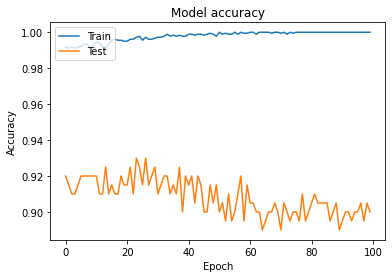

In [117]:
import matplotlib.pyplot as plt
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()


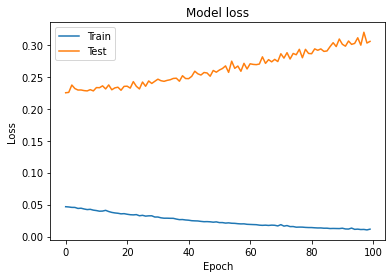

In [118]:
# import matplotlib.pyplot as plt
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()
